## Sample model to visually display if the workplace is toxic or not based on NLTK sentiment analysis.
Contributed by: Chinmay Kulkarni, Swapnika Dulam, Tobi Ajayi


The user can enter specific subreddit they are interested in, as the input for model or type a '*' to get from our pre-existing list of top employers. This model is specifically to analyze toxicity at workplace flow of our overall model.

To run this model, update the client-id, client secret with details from secret.txt or enter your reddit credentials.

For more detailed explanation check 'RedditSentimentKeywordExtraction.ipynb'

In [1]:
%pip install nltk
%pip install praw
import nltk
nltk.download('vader_lexicon')  # Download the sentiment analysis lexicon
nltk.download('punkt')           # Download the Punkt tokenizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.0 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import nltk
print("NLTK Version:", nltk.__version__)

NLTK Version: 3.8.1


Enter the subreddit name if you know else type *: *


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



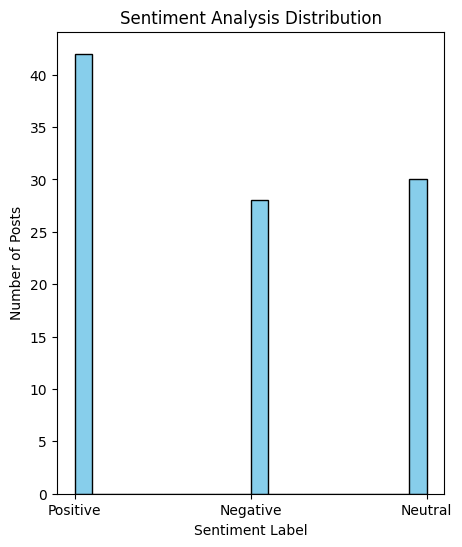

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Overall Sentiment for walmart : Positive


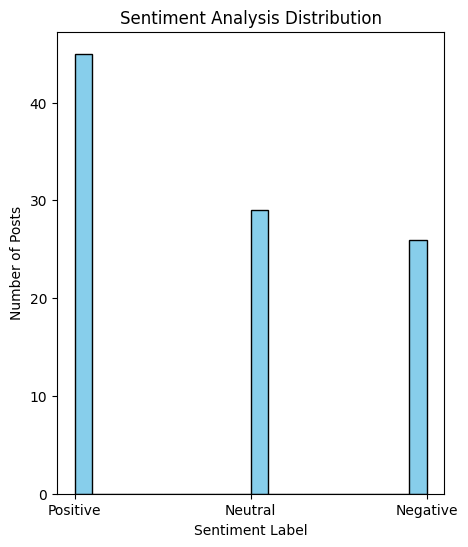

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Overall Sentiment for AmazonFC : Positive


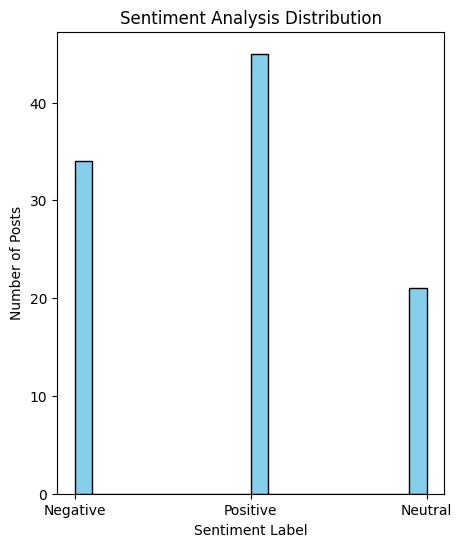

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Overall Sentiment for Target : Positive


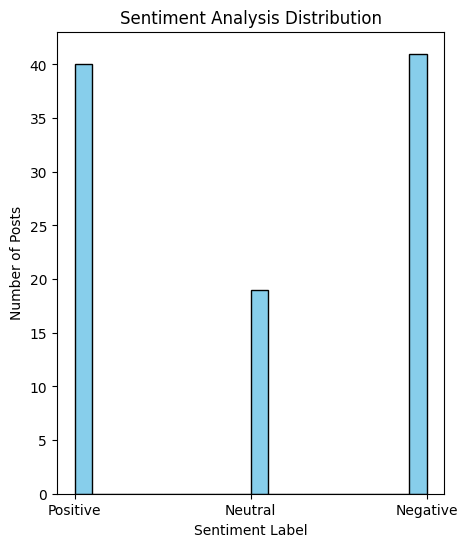

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Overall Sentiment for HomeDepot : Negative


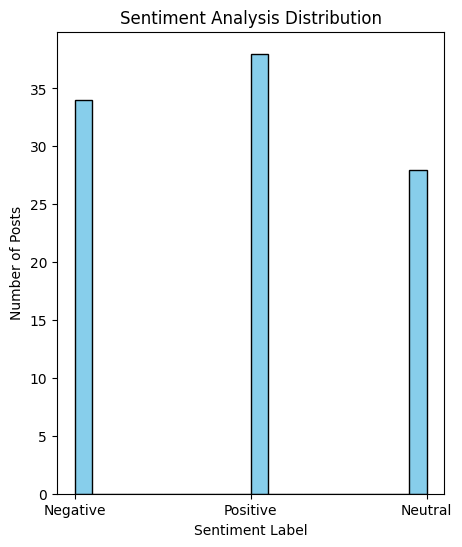

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Overall Sentiment for UPSers : Positive


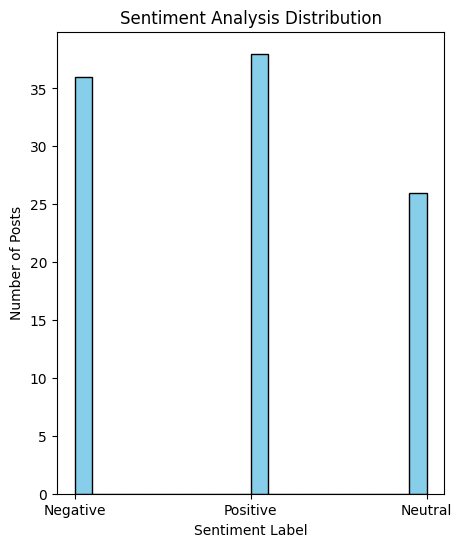

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Overall Sentiment for Fedexers : Positive


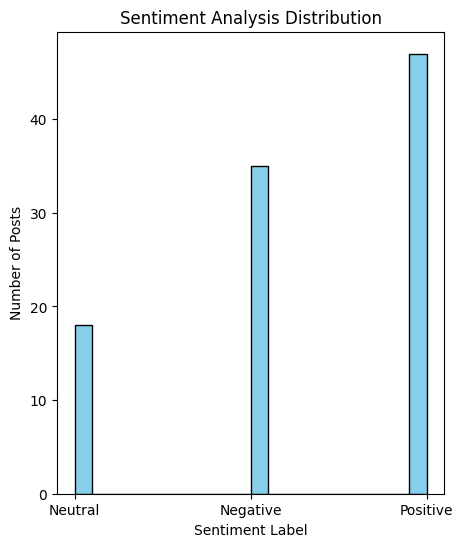

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Overall Sentiment for kroger : Positive


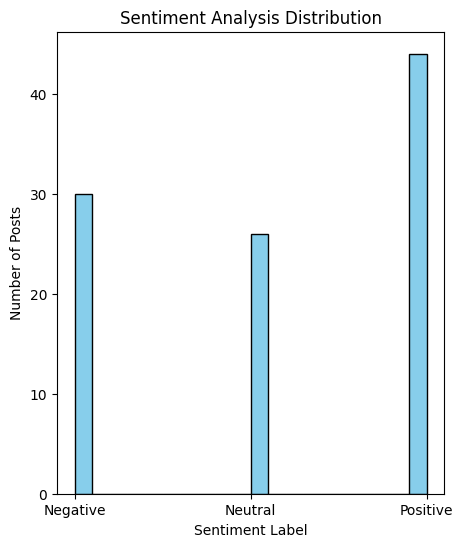

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Overall Sentiment for starbucks : Positive


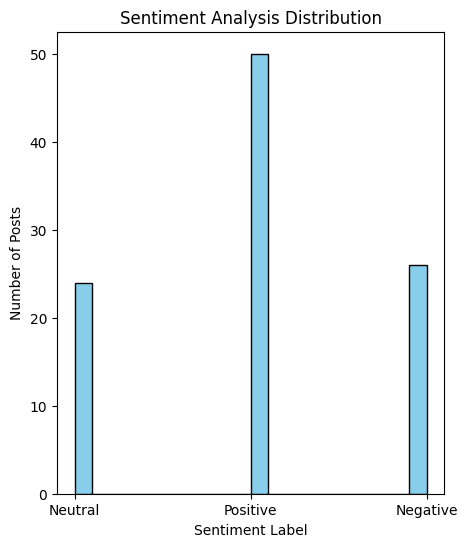

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Overall Sentiment for DairyQueen : Positive


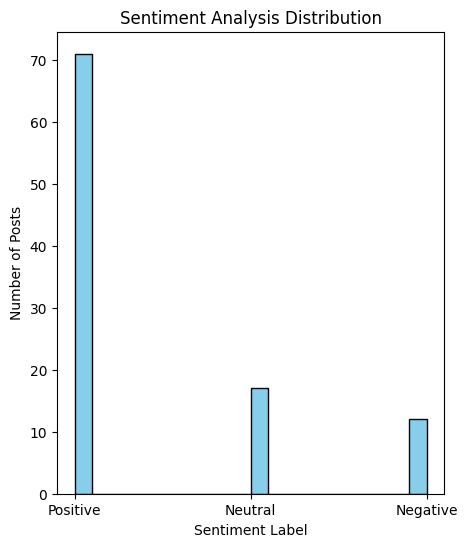

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Overall Sentiment for marriott : Positive


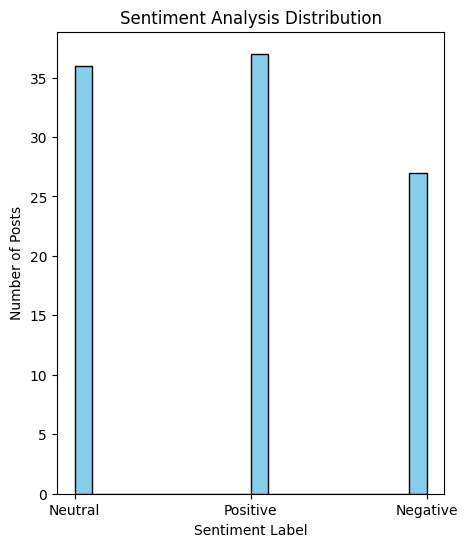

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Overall Sentiment for WalgreensStores : Positive


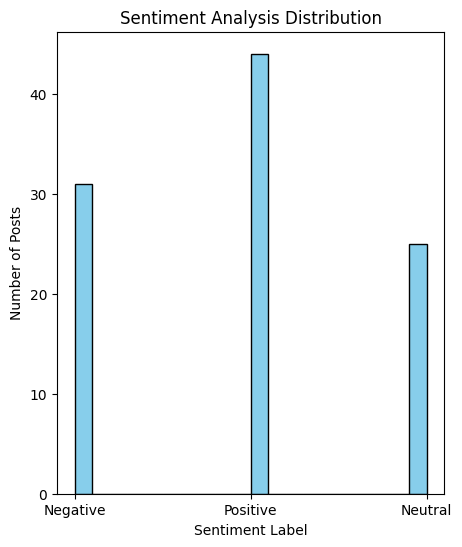

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Overall Sentiment for TjMaxx : Positive


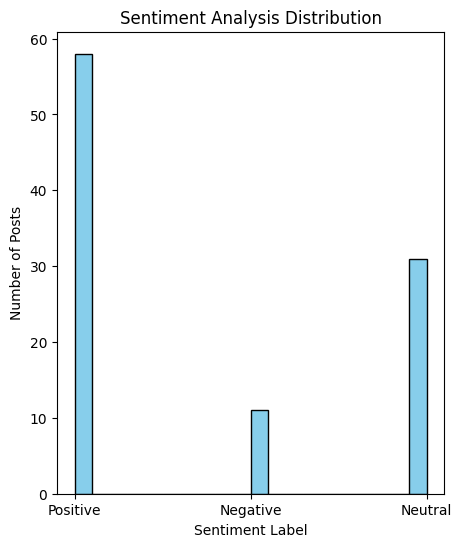

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Overall Sentiment for costco : Positive


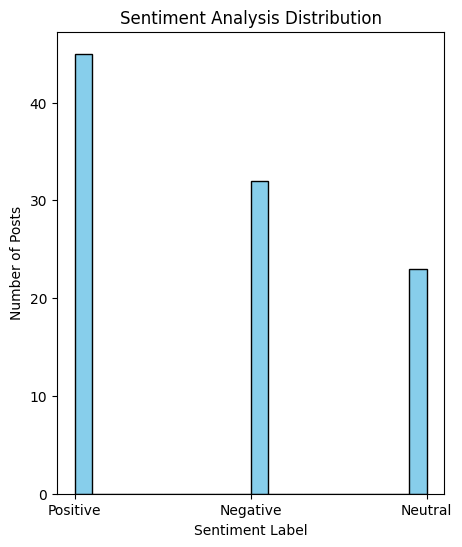

Overall Sentiment for McDonaldsEmployees : Positive


In [13]:
import praw
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

def get_reddit_posts(subreddit_name, num_posts=100):
    reddit = praw.Reddit(client_id="client_id",
                         client_secret="client_secret",
                         user_agent='YOUR_USER_AGENT')

    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.new(limit=num_posts)

    return [post.title + ' ' + post.selftext for post in posts]

def analyze_sentiment(posts):
    sia = SentimentIntensityAnalyzer()
    scores = []

    for post in posts:
        score = sia.polarity_scores(post)['compound']
        label = 'Neutral'
        if score > 0.2:
          label = 'Positive'
        if score < -0.2:
          label = 'Negative'

        scores.append(label)

    return scores

def visualize_sentiment(scores):
    plt.figure(figsize=(5, 6))
    plt.hist(scores, bins=20, color='skyblue', edgecolor='black')
    plt.title('Sentiment Analysis Distribution')
    plt.xlabel('Sentiment Label')
    plt.ylabel('Number of Posts')
    plt.show()


def process_subreddit(subreddit_name):
    posts = get_reddit_posts(subreddit_name)
    sentiment_labels = analyze_sentiment(posts)
    visualize_sentiment(sentiment_labels)

    result = sentiment_labels.count("Positive") > sentiment_labels.count("Negative")

    if result:
        print("Overall Sentiment for "+subreddit_name+" : Positive")
    else:
        print("Overall Sentiment for "+subreddit_name+" : Negative")


def main():
    subreddit_name = input("Enter the subreddit name if you know else type *: ")
    subreddits_list = ["walmart", "AmazonFC", "Target", "HomeDepot", "UPSers", "Fedexers", "kroger","starbucks", "DairyQueen", "marriott", "WalgreensStores", "TjMaxx", "costco", "McDonaldsEmployees"]
    if subreddit_name!='*':
      posts = process_subreddit(subreddit_name)

    else:
      for sub_reddit in subreddits_list:
        posts = process_subreddit(sub_reddit)




if __name__ == "__main__":
    main()
